In [52]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# UPLOAD FILES FROM PC

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Q3_dataset.csv to Q3_dataset.csv


In [53]:
import os
import io
# Load the dataset
# data = pd.read_csv("C:/Users\Data Engineer\Desktop\q3_data.csv")
data = pd.read_csv(io.BytesIO(uploaded['Q3_dataset.csv']))
print(data)



  Customer  Annual Income ($1000)  Spending Score (1 - 100)  Unnamed: 3
0        A                     40                        60         NaN
1        B                     60                        50         NaN
2        C                     30                        80         NaN
3        D                     70                        20         NaN
4        E                     80                        10         NaN
5        F                     20                        90         NaN
6        G                     50                        45         NaN
7        H                     10                        95         NaN


# Clustering Start

In [55]:
# Extract features for clustering
X = data.iloc[:, [1, 2]].values  # Columns 2 and 3 (Annual Income and Spending Score)
print(X)
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

[[40 60]
 [60 50]
 [30 80]
 [70 20]
 [80 10]
 [20 90]
 [50 45]
 [10 95]]


In [56]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

# Getting the cluster assignments and centroids
cluster_assignments = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

# Adding cluster assignments to the original data
data['Cluster'] = cluster_assignments

# Display final cluster assignments and cluster centroids
print("Final Cluster Assignments:")
print(data[['Customer', 'Cluster']])

print("\nFinal Cluster Centroids:")
print(cluster_centroids)

Final Cluster Assignments:
  Customer  Cluster
0        A        0
1        B        0
2        C        1
3        D        2
4        E        2
5        F        1
6        G        0
7        H        1

Final Cluster Centroids:
[[ 0.21821789 -0.15677535]
 [-1.09108945  1.09742742]
 [ 1.30930734 -1.41097811]]


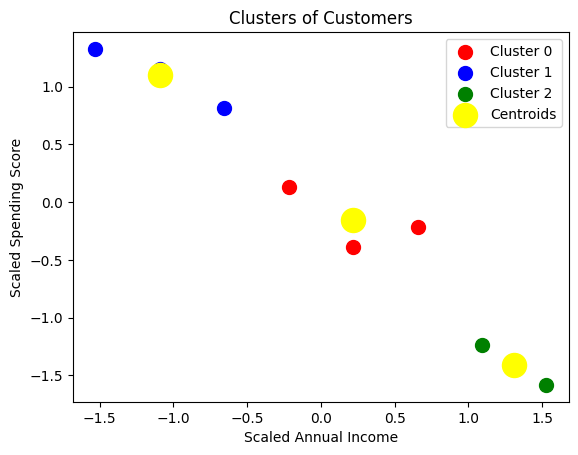

In [57]:
# Visualize the clusters
plt.scatter(X_scaled[cluster_assignments == 0, 0], X_scaled[cluster_assignments == 0, 1], s=100, c='red', label='Cluster 0')
plt.scatter(X_scaled[cluster_assignments == 1, 0], X_scaled[cluster_assignments == 1, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(X_scaled[cluster_assignments == 2, 0], X_scaled[cluster_assignments == 2, 1], s=100, c='green', label='Cluster 2')
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()

# a) **Initialize three initial cluster centroids randomly:**

To initialize the cluster centroids randomly, wecan randomly select three data points from our dataset as initial centroids.

In [58]:
import random

# Convert X_scaled numpy array to a list
X_scaled_list = X_scaled.tolist()

# Choose three random data points as initial centroids
initial_centroids = random.sample(X_scaled_list, k=3)
initial_centroids

[[0.2182178902359924, -0.3848122123281115],
 [-0.6546536707079772, 0.8123813371371242],
 [1.5275252316519468, -1.5820057617933472]]

# b) **Assign each customer to the nearest cluster based on the Euclidean distance:**

For each data point, calculate its Euclidean distance to each centroid and assign it to the cluster with the closest centroid.

In [59]:
def assign_to_nearest_cluster(data_point, centroids):
    distances = [np.linalg.norm(data_point - centroid) for centroid in centroids]
    nearest_cluster = np.argmin(distances) #np.argmin returns the index of the smallest value in the distances list.
    return nearest_cluster

cluster_assignments = [assign_to_nearest_cluster(point, initial_centroids) for point in X_scaled]
cluster_assignments


[0, 0, 1, 2, 2, 1, 0, 1]

# c) **Recalculate the cluster centroids:**

Calculate the mean of all data points assigned to each cluster to find the new centroids.

In [60]:
def recalculate_centroids(data, assignments, num_clusters):
    new_centroids = []
    for cluster in range(num_clusters):
        cluster_points = [data[i] for i in range(len(data)) if assignments[i] == cluster]
        new_centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(new_centroid)
    return new_centroids

new_centroids = recalculate_centroids(X_scaled, cluster_assignments, num_clusters=3)


#d) **Repeat the assignment and recalculation steps until convergence:**

Repeat steps b and c iteratively until the cluster assignments and centroids stop changing significantly between iterations.

In [61]:
#limit to stop iterating for convergance
max_iterations = 100

for iteration in range(max_iterations):
    new_assignments = [assign_to_nearest_cluster(point, new_centroids) for point in X_scaled]
    if new_assignments == cluster_assignments:
        break
    cluster_assignments = new_assignments
    new_centroids = recalculate_centroids(X_scaled, cluster_assignments, num_clusters=3)


# e) **Provide the final cluster assignments and cluster centroids.**

In [62]:
# Print the final cluster assignments
print("Final Cluster Assignments:")
for i, assignment in enumerate(cluster_assignments):
    print(f"Customer {i+1}: Cluster {assignment}")

# Print the final cluster centroids
print("\nFinal Cluster Centroids:")
for cluster, centroid in enumerate(new_centroids):
    print(f"Cluster {cluster}: {centroid}")


Final Cluster Assignments:
Customer 1: Cluster 0
Customer 2: Cluster 0
Customer 3: Cluster 1
Customer 4: Cluster 2
Customer 5: Cluster 2
Customer 6: Cluster 1
Customer 7: Cluster 0
Customer 8: Cluster 1

Final Cluster Centroids:
Cluster 0: [ 0.21821789 -0.15677535]
Cluster 1: [-1.09108945  1.09742742]
Cluster 2: [ 1.30930734 -1.41097811]


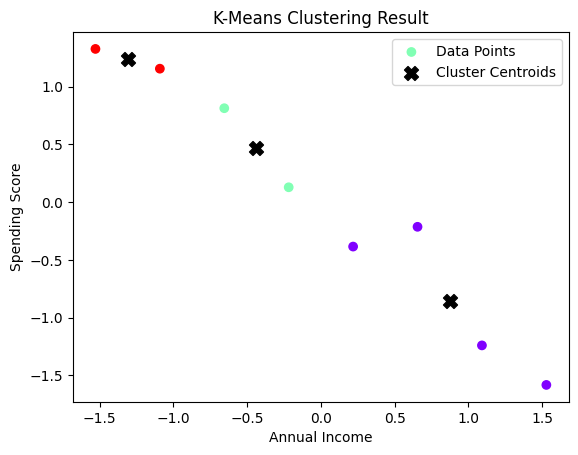

In [ ]:
# Plot the data points and cluster centroids
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_assignments, cmap='rainbow', label='Data Points')
plt.scatter(np.array(new_centroids)[:, 0], np.array(new_centroids)[:, 1], c='black', marker='X', s=100, label='Cluster Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering Result')
plt.legend()
plt.show()


# **Question 2**

You are working with a dataset that contains information about different types of animals based on two features: height (in centimeters) and weight (in kilograms). You want to use the k-Nearest Neighbors (k-NN) algorithm to classify animals into two categories: "Mammals" and "Reptiles." You have the following extended training dataset:

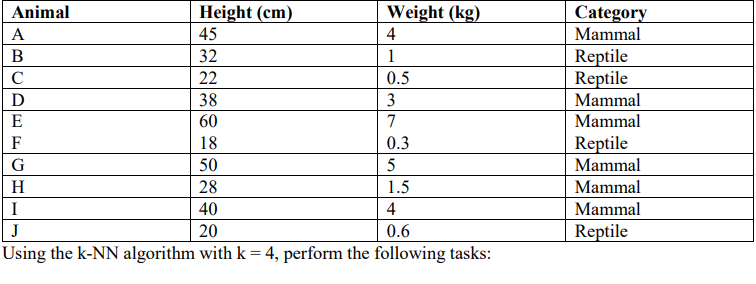

Develop Program which can
a) Calculate the Euclidean distance between the test animal (height: 35 cm, weight: 2.5 kg) and eachdata point.
b) Determine the k-nearest neighbours for the test animal.
c) Predict the category for the test animal based on the majority category among its k-nearest neighbours.

In [63]:
import pandas as pd
import numpy as np
from collections import Counter
from google.colab import files
import io


In [66]:
uploaded = files.upload()

Saving dataset Q2.csv to dataset Q2.csv


In [67]:
#Sample training dataset
data = pd.read_csv(io.BytesIO(uploaded['dataset Q2.csv']),skiprows=3)
print(data)

  Animal  Height (cm)  Weight (kg)  Category
0      A           45           4.0   Mammal
1      B           32           1.0  Reptile
2      C           22           0.5  Reptile
3      D           38           3.0   Mammal
4      E           60           7.0   Mammal
5      F           18           0.3  Reptile
6      G           50           5.0   Mammal
7      H           28           1.5   Mammal
8      I           40           4.0   Mammal
9      J           20           0.6  Reptile


In [68]:
# Test animal's features (height and weight)
test_animal = [35, 2.5]

## Jumla MO'utarizaa


In [21]:
# Example DataFrame
import pandas as pd

data = pd.DataFrame({
    'Column1': ['Animal1', 'Animal2', 'Animal3', 'Animal4'],
    'Height': [40, 30, 35, 45],
    'Weight': [5, 3, 2.5, 4],
    'Category': ['Mammal', 'Reptile', 'Reptile', 'Mammal']
})
print(data)
# Remove rows by index
rows_to_remove = [2, 3]  # Indices of rows to remove
data_cleaned = data.drop(rows_to_remove)

# Or, select a subset of rows using boolean indexing
rows_to_keep = [True, True, False, False]  # Keep rows 0 and 1, remove 2 and 3
data_cleaned = data[rows_to_keep]

print(data_cleaned)

   Column1  Height  Weight Category
0  Animal1      40     5.0   Mammal
1  Animal2      30     3.0  Reptile
2  Animal3      35     2.5  Reptile
3  Animal4      45     4.0   Mammal
   Column1  Height  Weight Category
0  Animal1      40     5.0   Mammal
1  Animal2      30     3.0  Reptile


# A: **Calculate Euclidean distance between test animal and each data point**


In [70]:
# print(new_data)
print('Test Data \n',np.array(test_animal))

# Extract features for clustering
X = data.iloc[:, [1, 2]].values  # Columns 2 and 3 (Height & Weight)

# Extract the height and weight values using list comprehension
height_weight_array = np.array([[record[0], record[1]] for record in X])
print(height_weight_array)

# Calculate Euclidean distances
distances = [np.linalg.norm(np.array(test_animal) - record) for record in height_weight_array]


Test Data 
 [35.   2.5]
[[45.   4. ]
 [32.   1. ]
 [22.   0.5]
 [38.   3. ]
 [60.   7. ]
 [18.   0.3]
 [50.   5. ]
 [28.   1.5]
 [40.   4. ]
 [20.   0.6]]


# B: Determine k-nearest neighbours for the test animal


In [71]:
k = 3  # Number of neighbors to consider
nearest_indices = np.argsort(distances)[:k]
print(nearest_indices)

[3 1 8]


# C: P**redict the category for the test animal based on majority category among k-nearest neighbors**


In [72]:
print(data)
# nearest_categories = [data[index][3] for index in nearest_indices]
# nearest_categories = [data[index][3] for index in nearest_indices] # This showed error
nearest_categories = [data.loc[index, 'Category'] for index in nearest_indices]
predicted_category = Counter(nearest_categories).most_common(1)[0][0]
predicted_category


  Animal  Height (cm)  Weight (kg)  Category
0      A           45           4.0   Mammal
1      B           32           1.0  Reptile
2      C           22           0.5  Reptile
3      D           38           3.0   Mammal
4      E           60           7.0   Mammal
5      F           18           0.3  Reptile
6      G           50           5.0   Mammal
7      H           28           1.5   Mammal
8      I           40           4.0   Mammal
9      J           20           0.6  Reptile


'Mammal'

In [73]:
print(f"Test Animal's Features: Height = {test_animal[0]} cm, Weight = {test_animal[1]} kg")
print("K-Nearest Neighbors:")
for index in nearest_indices:
    print(f"Animal: {data.loc[index, 'Animal']}, Distance: {distances[index]:.2f}, Category: {data.loc[index, 'Category']}")

print(f"\nPredicted Category for Test Animal: {predicted_category}")

Test Animal's Features: Height = 35 cm, Weight = 2.5 kg
K-Nearest Neighbors:
Animal: D, Distance: 3.04, Category: Mammal
Animal: B, Distance: 3.35, Category: Reptile
Animal: I, Distance: 5.22, Category: Mammal

Predicted Category for Test Animal: Mammal


# **Question 1**

Suppose you are analyzing the relationship between the sales of a product and two independent variables: advertising expenditure (in thousands of dollars) and the number of salespeople involved.
You have collected the following data:

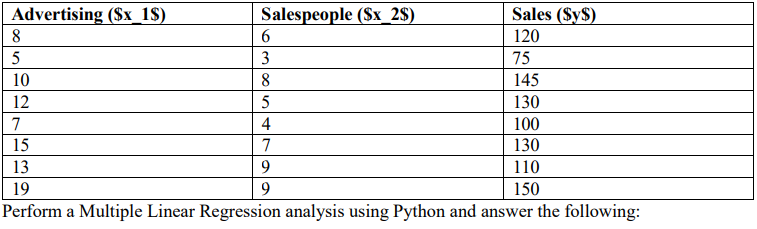

Perform a Multiple Linear Regression analysis using Python and answer the following:
Write Code (in Java or Python)

a) Which can generate equation of the regression plane?

b) Interpret the coefficients of the independent variables.

c) Calculate the R-squared value.

d) Predict the sales when advertising expenditure is $9,000 and there are 7 salespeople.


In [74]:
# @title
#let's import necessary Libraries.
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [75]:
# @title
# Sample Data
dataset = {
    'Advertising':[8,5,10,12,7,15,13,19],
    'SalesPeople':[6,3,8,5,4,7,9,9],
    'Sales':[120,75,145,130,100,130,110,150],
}
data = pd.DataFrame(dataset)
print(data)

   Advertising  SalesPeople  Sales
0            8            6    120
1            5            3     75
2           10            8    145
3           12            5    130
4            7            4    100
5           15            7    130
6           13            9    110
7           19            9    150


a) **The equation of the regression plane is generated by the coefficients obtained from the regression analysis. It's displayed in the summary table.**

b) **The coefficients of the independent variables (Advertising and SalesPeople) are displayed in the summary table.**

They indicate how a one-unit change in each independent variable impacts the dependent variable (Sales), while keeping other variables constant.

c) **The R-squared value is calculated and displayed in the summary table. It quantifies the goodness of fit of the model.**

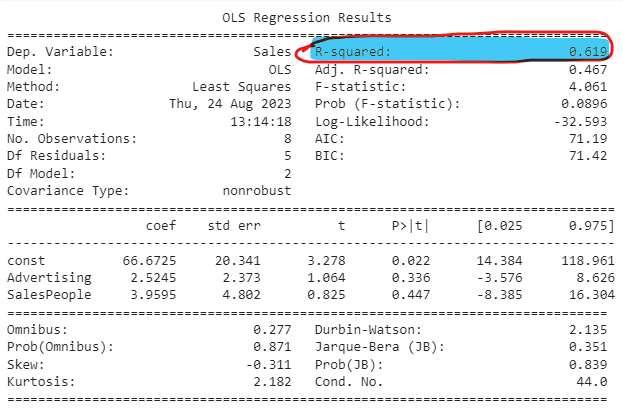


d) **Predict the sales** when advertising expenditure is **$9,000** and there are **7 salespeople**

In [76]:
# Add a constant term to the independent variables
X = sm.add_constant(data[['Advertising', 'SalesPeople']])
y = data['Sales']
X

,const,Advertising,SalesPeople
0,1.0,8,6
1,1.0,5,3
2,1.0,10,8
3,1.0,12,5
4,1.0,7,4
5,1.0,15,7
6,1.0,13,9
7,1.0,19,9


In [77]:
# Perform the multiple linear regression analysis
model = sm.OLS(y, X).fit()
# Display the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.061
Date:                Tue, 12 Sep 2023   Prob (F-statistic):             0.0896
Time:                        10:26:12   Log-Likelihood:                -32.593
No. Observations:                   8   AIC:                             71.19
Df Residuals:                       5   BIC:                             71.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          66.6725     20.341      3.278      

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [78]:
# d) You can use the model to predict sales for specific values of Advertising and SalesPeople.
new_data = pd.DataFrame({'const': [1,1,1,1,1], 'Advertising': [9,20,20,9,18], 'SalesPeople': [7,11,5,14,14]})
predicted_sales = model.predict(new_data)
print('Predicted Sales:', predicted_sales)


Predicted Sales: 0    117.110047
1    160.718095
2    136.960974
3    144.826688
4    167.547570
dtype: float64


**# Multiple Regression**

**--> Y = b0 + b1x1 + b2x2**

**--> b0 = Y' - b1.x1' - b2.x2'**

**--> b1 = (Σx2^2)(Σx1y) - (Σx1x2)(Σx2y) / (Σx1^2)(Σx2^2) - (Σx1x2)^2**

**--> b1 = (Σx1^2)(Σx2y) - (Σx1x2)(Σx1y) / (Σx1^2)(Σx2^2) - (Σx1x2)^2**

In [ ]:
# Load your dataset
# Assume 'X1' and 'X2' are independent variables, and 'Y' is the dependent variable
# You need to replace these variable names with your actual column names
X1 = dataset['Advertising'].values
X2 = dataset['SalesPeople'].values
Y = dataset['Sales'].values

# Adding a constant term to the predictor variables
X['const'] = 1
